<h1>
    <center>
        Causas de muerte en el mundo
    </center>
</h1>

<h2>
    <center>
        Alberto Fernández Hernández
        <br> <br>
        Fecha 15/10/2020
    </center>
</h2>

<hr>
NOTA: Todos los ficheros de datos están situados en la carpeta "ficheros" de la entrega.

## Introducción

El desarrollo del presente trabajo consiste en analizar, por medio de varias funciones previamente desarrolladas en Python, los valores tanto de población como de mortalidad en el mundo, en base a un conjunto de datos obtenidos a partir del sitio web oficial [__World in Data__](https://ourworldindata.org)

## Apartado a) 

En las páginas de World in Data puedes encontrar una tabla csv sobre el crecimiento de la población mundial por países ( _Population growth by country_ ). Diseña una función que cargue dicha tabla y genere un diccionario, que para cada país y cada año, nos dé su población.

Ten cuidado, además de los países, esta tabla contiene información de regiones (Europa por ejemplo), con o sin código, y del mundo entero.


### Solución
Para la creación del diccionario, se han desarrollado dos funciones. En primer lugar, __crecimiento_por_pais_anno( )__ . Esta función permite, inicialmente, leer los datos contenidos en el fichero csv pasado por parametro, por medio del método _reader_ de la librería csv (el fichero ha de estar separado por comas).  Una vez leidos los datos, descartamos la cabecera, la cual contiene los nombres de columnas, empleando para ello la función __next( )__ , que permite omitir la fila sobre la que se encuentre el puntero. 

```
with open(fichero) as archivo:
        archivo_csv = csv.reader(archivo, delimiter=",")
        next(archivo_csv)
```

A continuación, dado que el conjunto de datos contiene tanto el campo país ( _Entity_ ) como su código ( _Code_ ), se ha decidido omitir este segundo campo, por dos motivos:

1. __Redundancia de información__ (solo necesitaríamos uno de los dos campos para identificar un país en el diccionario)
2. __Presencia de campos vacíos__ (existen regiones en el fichero sin el campo Código)

Para eliminar dicha columna, una vez obtenidas cada una de las filas mediante una lista intensional ( _filas_ ), eliminamos la segunda posición de cada fila obtenida a través de la función __pop( )__ , la cual permite eliminar el elemento de una lista como si de una pila de datos se tratase.

```
filas = [fila for fila in archivo_csv]
[fila.pop(1) for fila in filas]
```

Una vez eliminada la segunda columna, a través de un conjunto ( _set_ ) con los nombres de países que previamente se han ido almacenando, se crea el diccionario final, formado por el conjunto de parejas:

1. __CLAVE__ : cada país almacenado en el _set_ , ordenado __alfabeticamente__
2. __VALOR__ : mediante una función auxiliar denominada __crecimiento_por_pais( )__ , cuya función será crear un diccionario formado por las parejas años, poblacion de cada país

In [1]:
import csv
import os

def crecimiento_por_pais_anno(fichero):
    """
    Funcion que devuelve un diccionario que contiene el valor de poblacion por 
    cada pais y anno almacenado en el fichero, SALVO la segunda columna
    
    Parameters
    ----------
    fichero: str
        Nombre del fichero a recuperar
    
    Return
    ------
    dict
        Diccionario formado por las parejas pais (clave) y, como valor, 
        un diccionario con la poblacion en cada anno
    
    Precondition
    ------------
    El fichero:
        Debe estar situado en la ruta indicada por parametro
        Debe estar en formato .csv (separado por comas)
        NO debe estar vacio
        Debe tener como MINIMO tres columnas
        
    Example
    -------
    >>> crecimiento_por_pais_anno('population.csv')
    {
        "Spain":  {
            1900:20134543,
            1901:20554593,
            1902:20994983
        },
        "France": {
            1900:20934543,
            1901:21050194,
            1902:21764183
        }
        ...
    }      
    """
    if not os.path.exists(fichero):
        raise FileNotFoundError("Error. El fichero no se encuentra en el directorio actual")

    elif not fichero.endswith(".csv"):
        raise Exception("Error. El fichero debe estar en formato csv")

    elif os.stat(fichero).st_size == 0:
        raise StopIteration("Error. El fichero esta vacio")

    with open(fichero) as archivo:
        archivo_csv = csv.reader(archivo, delimiter=",")

        next(archivo_csv)
        filas = [fila for fila in archivo_csv]

    if len(filas) < 3:
        raise IndexError("Error. El fichero debe tener como minimo tres columnas")

    paises = sorted(set(fila[0] for fila in filas))
    [fila.pop(1) for fila in filas]
    
    return {pais: crecimiento_por_pais([fila[1:] for fila in filas if pais in fila]) for pais in paises}

Para crear un diccionario con las parejas (años,población), la función auxiliar __crecimiento_por_pais( )__ recibe como parametro el listado con la población en cada año, generando con ello un diccionario de valores enteros. Para ello, de cada fila se extrae el primer elemento (el año), asociándolo como clave y el segundo elemento (población) como valor.

In [2]:
def crecimiento_por_pais(filas):
    """
    Funcion auxiliar que devuelve un diccionario con las parejas 
    anno, poblacion (clave, valor) de un pais
    
    Parameters
    ----------
    filas: list
        Lista de listas con las parejas annos, poblacion de un pais
    
    Return
    ------
    dict
        Diccionario formado por las parejas anno (clave) y 
        poblacion (valor), ambos valores enteros
        
    Example
    -------
    >>> crecimiento_por_pais([1900, 20134543], [1901, 20554593])
    {
        1900:20134543,
        1901:20554593
    }      
    """
    return {int(fila[0]) : int(fila[1]) for fila in filas}

Dado que la función principal __crecimiento_por_pais_anno( )__ ya comprueba previamente que el diccionario NO puede tener longitud menor que tres (el campo _Code_ a omitir y las dos columnas restantes), es un error que ya está controlado y por lo tanto no ha hecho falta incluirla de nuevo en la función auxiliar.

Seguidamente mostramos unas serie de pruebas de funcionamiento de ambas funciones.

In [3]:
# Pruebas diseñadas y ejecutadas en el apartado a)
# para mostrar el diccionario de forma mas estructurada, utilizamos el metodo dumps de la libreria json
import json

# crecimiento_por_pais - OK
prueba_crecimiento_por_pais = crecimiento_por_pais([[1900, 20134543], [1901, 20554593]])
print("Prueba crecimiento_por_pais (OK):\n", json.dumps(prueba_crecimiento_por_pais, indent = 4))

# crecimiento_por_pais_anno - OK
datos_poblacion = crecimiento_por_pais_anno("./ficheros/population.csv")

# Ejemplo de prueba con un pais y anno en particular
print("\nPrueba crecimiento_por_pais_anno (OK):\n", datos_poblacion["Afghanistan"][1900])

Prueba crecimiento_por_pais (OK):
 {
    "1900": 20134543,
    "1901": 20554593
}

Prueba crecimiento_por_pais_anno (OK):
 5021241


Sin embargo, puede ocurrir que el fichero no se encuentre en la ruta especificada, bien que no se encuentre en formato csv, que el fichero esté vacío o incluso que no tenga tres columnas como mínimo, necesarias para el correcto funcionamiento de la función.

In [4]:
# crecimiento por pais anno - Falla al no existir la ruta que conduce al fichero
crecimiento_por_pais_anno("no_existe.csv")

FileNotFoundError: Error. El fichero no se encuentra en el directorio actual

In [5]:
# crecimiento por pais anno - Falla al no estar en formato csv
crecimiento_por_pais_anno("causas_de_muerte.ipynb")

Exception: Error. El fichero debe estar en formato csv

In [6]:
# crecimiento por pais anno - Falla al estar vacio
crecimiento_por_pais_anno("./ficheros/datos.csv")

StopIteration: Error. El fichero esta vacio

In [7]:
# crecimiento por pais anno - Falla al no tener tres columnas como minimo
crecimiento_por_pais_anno("./ficheros/datos_con_dos_columnas.csv")

IndexError: Error. El fichero debe tener como minimo tres columnas

## Apartado b)
Como simples demostraciones, diseña expresiones o funciones que calculen lo siguiente:

### La población española en 1800.
Para consultar la poblacion en un país y año en particular, se ha diseñado la función __obtener_poblacion_paises_annos( )__ , la cual permite consultar los valores de población de uno o varios países o años (de cara a los próximos apartados). Para ello, la función utiliza como parámetro el diccionario previamente creado en el apartado a) así como un _set_ con el conjunto de países y años a consultar ( _param_paises_ y _param_annos_ ). 

```
obtener_poblacion_paises_annos(datos_poblacion, param_paises, param_annos)
```

Sin embargo, y antes de empezar con el diseño de la función, nos encontramos con un problema ¿Y si el país o países indicados no existen? ¿Y si los años a consultar tampoco existen para dicho país? Para evitar devolver un _KeyError_ , mediante una función auxiliar denominada __intersección( )__ se obtendrá la intersección entre dos conjuntos pasados como parametros, lo que permite saber qué paises y/o años están incluidos en el diccionario.

In [8]:
def interseccion(subconjunto1, subconjunto2):
    """
    Funcion que devuelve la interseccion ordenada de ambos elementos

    Parameters
    ----------
    subconjunto1 : set
    subconjunto2 : set

    Returns
    -------
    list
        Interseccion (paises/annos comunes) entre ambos parametros

    Example
    -------
    >> subconjunto({1998, 1999, -10000}, {1998, 1999})
    {1998, 1999}
    """
    return sorted(subconjunto1 & subconjunto2)

In [9]:
# Pruebas interseccion (OK)
subconjunto1 = {1998, 1999, -10000}; subconjunto2 = {1998, 1999};
print("Prueba 1. Interseccion: ", interseccion(subconjunto1, subconjunto2))
subconjunto1 = {2006, 2007, -10000}
print("Prueba 2. Interseccion: ", interseccion(subconjunto1, subconjunto2))
subconjunto1 = {"Spain", "France", "No existe"}; subconjunto2 = {"Spain", "France"};
print("Prueba 3. Interseccion: ", interseccion(subconjunto1, subconjunto2))

Prueba 1. Interseccion:  [1998, 1999]
Prueba 2. Interseccion:  []
Prueba 3. Interseccion:  ['France', 'Spain']


De esta forma, gracias a la función anterior podremos conocer la intersección entre los países pasados como parámetro y aquellos que estén almacenados en el diccionario (ídem con los años). A continuación, recorriendo en el diccionario cada uno de estos países debemos recuperar el valor de población para los años pasados como parámetro. Nuevamente, diseñamos para ello una función auxiliar encargada de recuperar dichos valores (años, población), en función de los años pasados como parámetro.

Esta función, denominada __parejas_annos_poblacion( )__ , recorre las parejas (años, población) del país en particular, filtrando aquellos indicados por el parámetro _param_annos_ , en caso de que exista.

In [10]:
def parejas_annos_poblacion(param_annos, annos_poblacion):
    """
    Funcion auxiliar que recupera las parejas annos:poblacion, cuyos annos
    esten incluidos en param_annos

    Parameters
    ----------
    param_annos : set
        Conjunto con los annos a filtrar
    annos_poblacion : dict
        Diccionario con los annos y poblacion disponibles

    Returns
    -------
    dict
        Diccionario con las parejas anno: poblacion filtradas segun param_annos
        
    Example
    -------
    >>> parejas_annos_poblacion({1998}, {1998: 40543123, 1999: 41546343})
    {
        1998: 40543123
    }

    """
    return {anno: annos_poblacion[anno] for anno in interseccion(param_annos, set(annos_poblacion))}

In [11]:
# Prueba parejas_annos_poblacion (OK)
param_annos = {1998}; annos_poblacion = {1998: 40543123, 1999: 41546343}
print("Prueba 1. Parejas_annos_poblacion (OK): ", parejas_annos_poblacion(param_annos, annos_poblacion))
param_annos = {1998, 1996}
print("Prueba 2. Parejas_annos_poblacion (OK): ", parejas_annos_poblacion(param_annos, annos_poblacion))
param_annos = {1995, 1996}
print("Prueba 3. Parejas_annos_poblacion (OK): ", parejas_annos_poblacion(param_annos, annos_poblacion))

Prueba 1. Parejas_annos_poblacion (OK):  {1998: 40543123}
Prueba 2. Parejas_annos_poblacion (OK):  {1998: 40543123}
Prueba 3. Parejas_annos_poblacion (OK):  {}


De este modo, la función filtra aquellos años que aparezcan en el diccionario. En caso de no coincidir ninguno, devolvería automáticamente un diccionario vacío ({}).

Una vez diseñadas las funciones auxiliares, procedemos con la función principal, __obtener_poblacion_paises_annos( )__ : inicialmente se recuperan aquellos paises pasados como parametro que aparezcan en el diccionario, evitando con ello posibles _KeyError_ (mediante la función __interseccion( )__ ). 

```
paises = interseccion(param_paises, set(datos_poblacion.keys()))
```

A continuación, por cada país debemos comprobar __si la intersección, entre _param_annos_ y los años almacenados en dicho país, es o no un conjunto vacío__ . A modo de ejemplo, si quiero consultar los años -10.000 y -9.000 en España (valores que no existen en el diccionario), si no se aplicara el filtro obtendríamos como resultado lo siguiente:

```
{ 'Spain': {}}
```

Para evitar estos casos, lo ideal es comprobar previamente si hay algún año que recuperar (de los pasados por parámetro) y, en caso afirmativo obtener dichos valores de población gracias a la función __parejas_annos_poblacion( )__ . En caso de no filtrar ningun pais/año del diccionario, devolvería un error.

In [12]:
def obtener_poblacion_paises_annos(datos_poblacion, param_paises, param_annos):
    """
    Funcion que devuelve los valores de poblacion en un/os pais/es y
    anno/s dado/s como argumentos. AVISO: Si NO encuentra resultados, 
    devuelve un diccionario vacio ({})

    Parameters
    ----------
    datos_poblacion : dict
        Diccionario con los datos completos de poblacion
    param_paises : set
        Conjunto con los paises a consultar
    param_annos : set
        Conjunto con los annos a consultar

    Returns
    -------
    dict
        Diccionario con los datos de poblacion en el/los anno/s pasado/s y pais/es
        pasado/s como argumentos
        
    Precondition
    ------------
    El diccionario y los parametros de consulta, NO deben estar vacios '{}'
    Debe filtrarse, al menos, un subconjunto de param_paises y param_annos
    
    Example
    -------
    >>> obtener_poblacion_annos(datos_poblacion, param_pais = {"Spain"} param_annos = {1998})
    { 'Spain':
        {
          1998: 40202000
        }
     }
    """
    if datos_poblacion == {} or param_paises == {} or param_annos == {}:
      raise ValueError("Error. El diccionario y/o los parametros de consulta estan vacios")

    paises = interseccion(param_paises, set(datos_poblacion.keys()))

    diccionario = dict()
    for pais in paises:
        if interseccion(param_annos, set(datos_poblacion[pais])) != []:
            diccionario[pais] = parejas_annos_poblacion(param_annos, datos_poblacion[pais])
    if diccionario == {}:
       raise ValueError("Error. No se han encontrado valores para " + str(param_paises) + "," + str(param_annos)) 
    return diccionario

Tras diseñar e implementar las funciones, procedemos con las pruebas pertinentes:

In [13]:
# Pruebas diseñadas y ejecutadas en el apartado b)
# obtener_poblacion_paises_annos - OK (solo filtra el anno 1800)
prueba_poblacion_paises_annos = obtener_poblacion_paises_annos(datos_poblacion, {"Spain"}, {1800, 2020})
print("Prueba 1. Crecimiento_paises_annos (OK):\n", json.dumps(prueba_poblacion_paises_annos, indent = 4))

prueba_poblacion_paises_annos = obtener_poblacion_paises_annos(datos_poblacion, {"Spain", "Europe"}, {1800, -1000})
print("Prueba 2. Crecimiento_paises_annos (OK):\n", json.dumps(prueba_poblacion_paises_annos, indent = 4))

Prueba 1. Crecimiento_paises_annos (OK):
 {
    "Spain": {
        "1800": 11549294
    }
}
Prueba 2. Crecimiento_paises_annos (OK):
 {
    "Europe": {
        "-1000": 22834476,
        "1800": 194630464
    },
    "Spain": {
        "1800": 11549294
    }
}


En contraposición, si el diccionario y/o los parametros de consulta están vacíos, o incluso si no existen valores en el diccionario para el país y año en particular, la función devolverá un error:

In [14]:
# obtener_poblacion_paises_annos - Conjunto vacio (FALLO - NO se encuentra ninguna coincidencia)
prueba_poblacion_paises_annos = obtener_poblacion_paises_annos(datos_poblacion, {"Spain", "France"}, {2020, 2021})

ValueError: Error. No se han encontrado valores para {'Spain', 'France'},{2020, 2021}

In [15]:
# obtener_poblacion_paises_annos - Conjunto vacio (FALLO - Parametros vacios)
prueba_poblacion_paises_annos = obtener_poblacion_paises_annos(datos_poblacion, {}, {2018})

ValueError: Error. El diccionario y/o los parametros de consulta estan vacios

### La población mundial (El mundo tiene sus propios registros en la tabla csv bajo el nombre “World” y el código “OWID_WRL”) en los años 10.000, 9.000, 8.000, ..., 1.000 antes de la era común.

Dado que hemos diseñado una función previa que permite filtrar los valores de población tanto por paises como por años, emplearemos esta misma función para resolver este apartado:

In [16]:
# Pruebas diseñadas y ejecutadas en el apartado c)
# obtener_poblacion_paises_annos - OK
# Intervalo de annos entre -10000 y el anno 1 (no incluido) de 1 en 1 (solo escoge aquellos annos que coincidan)
intervalo_annos = set(range(-10000, 1, 1))
prueba_poblacion_paises_annos = obtener_poblacion_paises_annos(datos_poblacion, {"World"}, intervalo_annos)
print("Prueba 4. Crecimiento_paises_annos (OK):\n", json.dumps(prueba_poblacion_paises_annos, indent = 4))

Prueba 4. Crecimiento_paises_annos (OK):
 {
    "World": {
        "-10000": 2431214,
        "-9000": 3564407,
        "-8000": 5136461,
        "-7000": 7561695,
        "-6000": 11461003,
        "-5000": 17920172,
        "-4000": 28370428,
        "-3000": 44819892,
        "-2000": 72108128,
        "-1000": 115065664
    }
}


### El incremento de la población en Europa entre dos años dados. Esto se ha de resolver con una función cuyos requisitos indiquen los años posibles de uso.

Para este último apartado, se ha diseñado una función aparte, denominada __evolucion_poblacion( )__ . Dicha función, además de los dos años, recibe directamente como parámetro un __diccionario con las parejas (años, poblacion)__ es decir, debe recibir directamente, como ejemplo:

```
{
        "1998": 24312141,
        "1999": 35644073,
        "2000": 51364614,
        "2001": 75616955,
        "2002": 114610036
}
```

Dado que lo primordial es trabajar directamente con las parejas (años, poblacion). Para ello, la función comprobará si la clave del diccionario es un string (nombre del país) y, en caso afirmativo, devolverá un error. 

Una vez obtenido dicho diccionario, la función devolverá (en el mismo formato) la diferencia de población entre ambos años, por lo que el valor puede ser o bien positivo o negativo, calculando su diferencia.

In [17]:
def evolucion_poblacion(datos_poblacion, fecha_ini, fecha_fin):
    """
    Funcion que calcula la evolucion de la poblacion de un pais entre dos annos dados

    Parameters
    ----------
    datos_poblacion : dict
        Diccionario con los datos de la poblacion en cada anno
    fecha_ini, fecha_fin: int
        Fecha de inicio, fin
        
    Returns
    -------
    dict
        Diccionario con la evolucion historica
    
    Precondition
    ------------
    El diccionario debe contener DIRECTAMENTE las parejas annos, poblacion del pais en particular
    El diccionario NO debe estar vacio
    fecha_ini < fecha_fin
        La fecha de inicio debe ser estrictamente menor a la fecha fin
    Si no existen los annos a consutar, devuelve un listado con los annos disponibles
    
    Example
    -------
    >> calcular_evolucion_poblacion(datos_poblacion.get('Europe'), 1998, 1999)
    {
         1998 y 1999: 79444992
     }
    """
    if datos_poblacion == {}:
        raise ValueError("Error. El diccionario esta vacio")
    elif fecha_ini > fecha_fin:
        raise ValueError("Error. La fecha de inicio debe ser menor a la fecha de fin")

    elif any(str(clave).isalpha() for clave in list(datos_poblacion.keys())):
        raise ValueError("Error. Debe indicar directamente el conjunto de annos,poblacion. Ej: datos_poblacion.get('Europe')")

    annos_comunes = {fecha_ini, fecha_fin} - set(datos_poblacion)
    if annos_comunes != set():
        conjunto_disponible = str(sorted(datos_poblacion.keys()))
        raise ValueError("Error. Los annos seleccionados no estan disponibles. Listado de annos disponibles: \n" + conjunto_disponible)

    return {str(fecha_ini)+" y "+str(fecha_fin): datos_poblacion[fecha_fin] - datos_poblacion[fecha_ini]}

A continuación, una vez diseñada la función se procede a realizar el conjunto de pruebas necesarias para su correcto funcionamiento:

In [18]:
# evolucion_poblacion - OK
prueba_evolucion_poblacion = evolucion_poblacion(datos_poblacion.get("Europe"), 2007, 2019)
print("Prueba 1. Evolucion_poblacion (OK):\n", json.dumps(prueba_evolucion_poblacion, indent = 4))
print("Calculo manual prueba 1: ", str(datos_poblacion["Europe"][2019] - datos_poblacion["Europe"][2007]))

# En este caso, la poblacion alemana disminuye (II Guerra Mundial)
prueba_evolucion_poblacion = evolucion_poblacion(datos_poblacion.get("Germany"), 1944, 1945)
print("\nPrueba 2. Evolucion_poblacion (OK):\n", json.dumps(prueba_evolucion_poblacion, indent = 4))
print("Calculo manual prueba 2: ", str(datos_poblacion["Germany"][1945] - datos_poblacion["Germany"][1944]))

Prueba 1. Evolucion_poblacion (OK):
 {
    "2007 y 2019": 15243968
}
Calculo manual prueba 1:  15243968

Prueba 2. Evolucion_poblacion (OK):
 {
    "1944 y 1945": -1955896
}
Calculo manual prueba 2:  -1955896


In [19]:
# evolucion_poblacion - FALLO
# Si introduzco directamente el diccionario (con los paises como claves)
prueba_evolucion_poblacion = evolucion_poblacion(datos_poblacion, 2007, 2019)

ValueError: Error. Debe indicar directamente el conjunto de annos,poblacion. Ej: datos_poblacion.get('Europe')

In [20]:
# evolucion_poblacion - FALLO
# Si introduzco annos que no aparecen
prueba_evolucion_poblacion = evolucion_poblacion(datos_poblacion.get("North America"), 1800, 1917)

ValueError: Error. Los annos seleccionados no estan disponibles. Listado de annos disponibles: 
[-10000, -9000, -8000, -7000, -6000, -5000, -4000, -3000, -2000, -1000, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [21]:
# evolucion_poblacion - FALLO
# Si introduzco un diccionario vacio
prueba_evolucion_poblacion = evolucion_poblacion({}, 1234, 1235)

ValueError: Error. El diccionario esta vacio

In [22]:
# evolucion_poblacion - FALLO
# Si la primera fecha es mayor a la segunda 
prueba_evolucion_poblacion = evolucion_poblacion(datos_poblacion.get("Europe"), 1998, 1997)

ValueError: Error. La fecha de inicio debe ser menor a la fecha de fin

## Apartado c)
Diseña ahora una función que genere una tabla de datos con las poblaciones de los distintos países entre dos años dados como parámetros (por ejemplo, entre 2007 y 2016). Esta tabla puede ser una simple lista de listas, o un array (de numpy) o un dataframe (de pandas) o incluso un diccionario.

### Solución

Para el diseño de este apartado, se ha decido utilizar, como tabla de datos, un objeto DataFrame de Pandas, principalmente por dos motivos:
1. __Facilidad de interpretación__ : a diferencia de una lista de listas, un diccionario o un array numpy, un DataFrame presenta por defecto un formato de tabla, lo que lo hace más intuitivo y fácil de interpretar gracias a la disposición de filas y columnas.
2. __Aprendizaje__ : por otro lado, se ha elegido como tabla de datos (incluso de cara a próximos apartados) con el objetivo de aprender en mayor profundidad su estructura, así como de las funciones de las que dispone.

Para generar la tabla de datos, se emplea una función denominada __generar_tabla_poblacion( )__ . Dicha función presenta como parámetros:
1. El diccionario con los datos de población previamente creado en el apartado a)
2. Los extremos del intervalo de fechas ( _fecha_ini_ y _fecha_fin_ )
3. El país a consultar. Este último parámetro presenta un valor por defecto ( __all__ ) que permite, en caso de no indicar ningún país, mostrar por defecto los valores de población de todos los países en el intervalo de fechas especificado.

```
generar_tabla_poblacion(datos_poblacion, fecha_ini, fecha_fin, pais = "all")
```

Para recuperar los valores de población se utiliza la función __obtener_poblacion_paises_annos( )__ previamente creada en el apartado b).

In [23]:
import pandas as pd

def generar_tabla_poblacion(datos_poblacion, fecha_ini, fecha_fin, pais = "all"):
    """
    Funcion que permite generar una tabla, en formato DataFrame, 
    con las poblaciones del pais pasado como parametro, entre dos annos dados. 
    AVISO: Devuelve DataFrame vacio si no encuentran coincidencias. 
    Si pais == "all" devuelve todos los paises

    Parameters
    ----------
    datos_poblacion: dict
        Diccionario con los datos de poblacion 
    fecha_ini, fecha_fin : int
        Fecha de inicio y fin del intervalo
    pais: str, optional
        Nombre del pais a consultar. Default: "all"

    Returns
    -------
    pandas.DataFrame
        Tabla, en formato DataFrame, con los valores de poblacion
        
    Precondition
    ------------
    fecha_ini <= fecha_fin
        La fecha de inicio debe ser menor o igual a la fecha de fin
    
    Example
    -------
    >> generar_tabla_poblacion(datos_poblacion, 1998, 1999)
              Afghanistan Albania  Algeria
    1998       101976989  11876991 12001002
    1999        8976981   91976989 101976989
    ...
    """
    if fecha_ini > fecha_fin:
        raise ValueError("Error. La fecha de fin debe ser mayor a la fecha de inicio")

    rango_fechas = set(range(fecha_ini, fecha_fin+1))

    if pais == "all":
        diccionario_datos = obtener_poblacion_paises_annos(datos_poblacion, set(datos_poblacion.keys()) , rango_fechas)
    else:
        diccionario_datos = obtener_poblacion_paises_annos(datos_poblacion, {pais}, rango_fechas)

    return pd.DataFrame.from_dict(diccionario_datos).sort_index(axis=1)

Tras crear la función, se procede con las pruebas pertinentes:

In [24]:
# Pruebas diseñadas y ejecutadas en el apartado c)
# generar_tabla_poblacion - OK
prueba_generar_tabla_poblacion = generar_tabla_poblacion(datos_poblacion, 2007, 2016)

# Mostramos un ejemplo con dos paises
print("Prueba 1. Evolucion_poblacion (OK): \n", prueba_generar_tabla_poblacion[["United States", "Vietnam"]])

# Numero de filas y columnas
print("Numero columnas: ", prueba_generar_tabla_poblacion.shape[1])

Prueba 1. Evolucion_poblacion (OK): 
       United States   Vietnam
2007      300608000  85420000
2008      303486016  86243000
2009      306308000  87092000
2010      309011008  87968000
2011      311584000  88871000
2012      314044000  89802000
2013      316400992  90753000
2014      318672992  91714000
2015      320878016  92677000
2016      323016000  93640000
Numero columnas:  242


In [25]:
# generar_tabla_poblacion - OK
# Con un solo pais y un mismo anno (Corea del Sur, 2007)
prueba_generar_tabla_poblacion = generar_tabla_poblacion(datos_poblacion, 2007, 2007, "South Korea")
print("Prueba 2. Evolucion_poblacion (OK): \n", prueba_generar_tabla_poblacion)

Prueba 2. Evolucion_poblacion (OK): 
       South Korea
2007     49035000


Como excepción, en caso de que la fecha de inicio sea mayor a la fecha de fin, no será posible generar el intervalo de años, por lo que devolverá un error.

In [26]:
# generar_tabla_poblacion - FALLO (La fecha de inicio es mayor a la fecha de fin)
generar_tabla_poblacion(datos_poblacion, 1999, 1998, "Spain")

ValueError: Error. La fecha de fin debe ser mayor a la fecha de inicio

## Apartado d)

Sería ideal mostrar la evolución de la población mundial entre dos fechas dadas, de la era común, y compararla con la de un país (otro parámetro). Para que los gráficos sean apreciables, convendría cambiar la escala del país, y lógicamente esa escala dependerá de la población del país, de manera que la función correspondiente tendrá que calcular esa escala con algún criterio razonable.

### Solución

Dado que los valores de la población mundial y la de un país determinado se mueven en una escala diferente, conviene pensar previamente la forma adecuada para comparar ambos valores. Para este apartado, se ha decidido __escalar los valores de la población del país al rango de valores de la población mundial__ , de forma que se muevan en torno al mismo intervalo de valores. Para entender mejor el concepto, pongamos un ejemplo: disponemos de dos listas de valores, de las que se pueden extraer los siguientes parámetros:

$r_{min}$ : Valor mínimo de la primera lista

$r_{max}$ : Valor máximo de la primera lista

$t_{min}$ : Valor mínimo de la segunda lista

$t_{max}$ : Valor máximo de la segunda lista

Supongamos que deseamos escalar los valores de la primera lista a la segunda. Para ello, en primer lugar __normalizamos los valores de la primera lista__ , esto es, situarlos en un intervalo entre 0 y 1. Para ello, a cada elemento le restamos el valor mínimo del intervalo, diviéndolo finalmente entre su amplitud:

<h3 align="center">
<font size="4">
    
$\frac{lista1 - r_{min}}{r_{max} - r_{min}}$
    
</font>
</h3>

Una vez normalizados, para cambiar los valores a la escala de la segunda lista, se multiplica cada valor por la amplitud de la segunda lista más $t_{min}$:

<h3 align="center">
<font size="3">
    
$\frac{lista1 - r_{min}}{r_{max} - r_{min}}\cdot(t_{max} - t_{min})$ + $t_{min}$
    
</font>
</h3>

De este modo, ambas gráficas tendrán el mismo intervalo de valores, por lo que en el caso de los datos del país será más significativo.

Para generar la gráfica con dicha escala, se diseña una primera función, denominada __mostrar_comparacion( )__ , la cual recibe como parámetros tanto el DataFrame con los valores de la población mundial como el DataFrame con los valores de población de un país en particular, creadas gracias a la función __generar_tabla_poblacion( )__ diseñada en el apartado c)

In [27]:
def mostrar_comparacion(df_evolucion_poblacion_pais, df_evolucion_poblacion_mundial):
    """
    Funcion encargada de mostrar graficamente la comparacion entre los valores 
    de poblacion mundial y los valores re-escalados de un pais

    Parameters
    ----------
    df_evolucion_poblacion_pais: pandas.DataFrame
        DataFrame con los datos a comparar
    df_evolucion_poblacion_mundial : pandas.DataFrame
        DataFrame con los datos de la poblacion mundial

    Returns
    -------
    Subplot1, Subplot2
        Graficas comparativas entre los valores del pais seleccionado y la poblacion mundial

    Precondition
    ------------
    Ambos DataFrames:
        deben tener el mismo numero de filas
        deben contener valores numericos
    """     
    try:
        if len(df_evolucion_poblacion_mundial) != len(df_evolucion_poblacion_pais):
            raise ValueError("Error. Las tablas no presentan el mismo numero de filas")
        
        pobl_min_pais, pobl_max_pais = int(df_evolucion_poblacion_pais.min()), int(df_evolucion_poblacion_pais.max())
        pobl_min_glob, pobl_max_glob = int(df_evolucion_poblacion_mundial.min()), int(df_evolucion_poblacion_mundial.max())
        formula = lambda poblacion: ((poblacion - pobl_min_pais) / (pobl_max_pais - pobl_min_pais)) * (pobl_max_glob - pobl_min_glob) + pobl_min_glob
        
        return imprimir_grafica(df_evolucion_poblacion_mundial, df_evolucion_poblacion_pais.apply(formula))
    except TypeError:
        print("Error. El DataFrame contiene valores NO numericos")

Posteriormente, se llama a la función auxiliar __imprimir_grafica( )__ pasando como parámetros tanto el DataFrame con la población mundial como el DataFrame con la población del país con los valores escalados, gracias a la función _apply_ que permite aplicar la función _lambda_ a todos los elementos de la tabla.

```
df_evolucion_poblacion_pais.apply(formula)
```

Dicha función mostrará dos gráficos de líneas ( _subplots_ ), uno por cada DataFrame, por medio del método _pyplot_ de la librería _matplotlib_ . Se ha elegido representar ambas tablas en gráficas diferentes dado que los valores del país se han re-escalado, por lo que la comparación no sería "realista" si se situaran en la misma figura.

Dichas gráficas presentan las siguientes características:

1. Para una mejor visualización, tanto los valores del gráfico como las etiquetas se han marcado en negrita, gracias al módulo _rc_ de _matplotlib_ , el cual permite configurar la fuente del texto, entre otros muchos parámetros.

```
rc("font", weight = "bold")
```

2. Los valores del eje X __no se abrevian con notación científica__, gracias a la expresión:

```
ticklabel_format(useOffset=False)
```

3. Con el objetivo de evitar que el eje X tome "años decimales" (por ejemplo: 2014.1, 2014.5) a cada gráfica se limitan los posibles valores de dicho eje a números __enteros__ mediante el módulo _MaxNLocator_ .

```
xaxis.set_major_locator(MaxNLocator(integer=True))
```

4. Como hoja de estilo para ambas gráficas, mediante el método _style.use_ se ha implementado el estilo de _ggplot_ , un popular paquete de representación gráfica del lenguaje R.

```
style.use("ggplot")
```

In [28]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MaxNLocator

def imprimir_grafica(df_evolucion_poblacion_mundial, df_evolucion_poblacion_pais):
    """
    Funcion que imprime un grafico comparativo entre ambos DataFrames

    Parameters
    ----------
    df_evolucion_poblacion_mundial : pandas.DataFrame
        DataFrame con los datos de la poblacion mundial
    df_evolucion_poblacion_pais : pandas.DataFrame
        DataFrame con los datos escalados de la poblacion de un pais

    Returns
    -------
    ax1, ax2 : Subplots
        Graficas comparativas con los datos de ambos DataFrames
    """
    pais = list(df_evolucion_poblacion_pais.columns)
    
    rc("font", weight = "bold")
    figura, (ax1, ax2) = plt.subplots(2, figsize = (12,12))
    
    plt.ticklabel_format(useOffset=False)
    ax1.plot(df_evolucion_poblacion_mundial, c="blue", linewidth=2.0)
    ax2.plot(df_evolucion_poblacion_pais, c="orange", linewidth=2.0)
    
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax2.set_xlabel("Años", fontsize=15)
    ax1.set_ylabel("Total poblacion (x $10^9$)", fontsize=15)
    ax2.set_ylabel("Total poblacion (re-escalado)", fontsize=15)
    
    ax1.legend(["Evolucion poblacion mundial"], loc="best")
    ax2.legend(["Evolucion poblacion -pais: " + pais[0] + "-"], loc="best")
    
    plt.suptitle("Comparativa entre los valores de la población mundial y los valores re-escalados de la poblacion en " + pais[0], fontsize = 15)
    plt.style.use('ggplot')
    
    return ax1, ax2

Finalmente, una vez diseñadas ambas funciones, procedemos con las pruebas pertinentes, utilizando la función principal _generar_tabla_poblacion_ . Para una primera prueba, se muestra un gráfico comparativo entre la evolución de la población mundial y la de Alemania durante la Segunda Guerra Mundial (1939-1945)

(<matplotlib.axes._subplots.AxesSubplot at 0x267eaf33eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x267eaf825c0>)

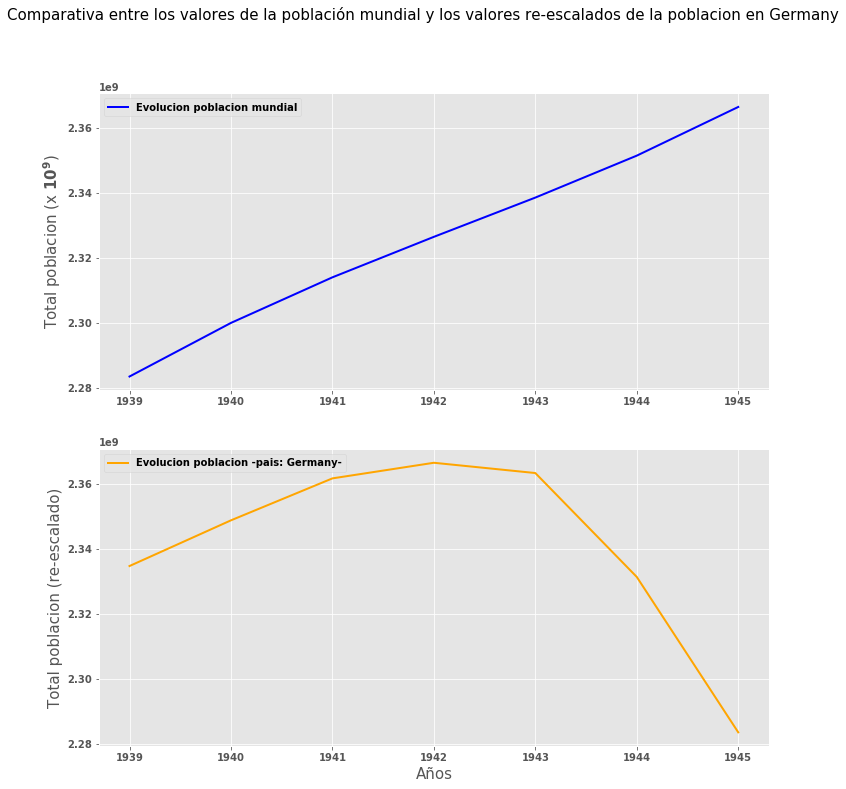

In [31]:
# Pruebas diseñadas y ejecutadas en el apartado d)
# generar_tabla_poblacion - OK
df_evolucion_poblacion_mundial = generar_tabla_poblacion(datos_poblacion, 1939, 1945, "World")
df_evolucion_poblacion_pais = generar_tabla_poblacion(datos_poblacion, 1939, 1945, "Germany")

mostrar_comparacion(df_evolucion_poblacion_pais, df_evolucion_poblacion_mundial)

(<matplotlib.axes._subplots.AxesSubplot at 0x267eb0270b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x267eb05ecc0>)

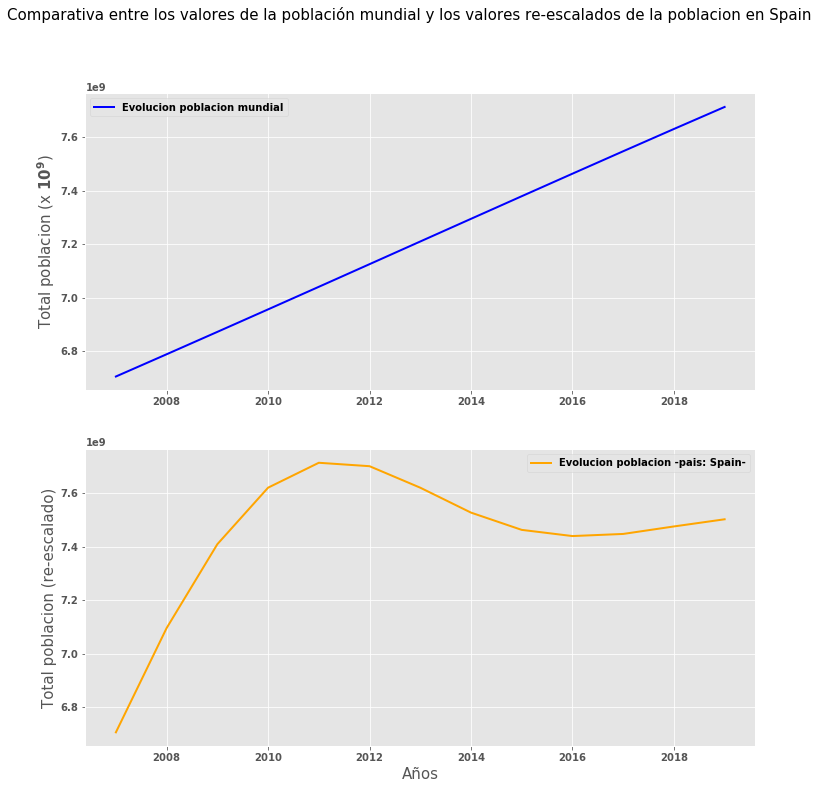

In [32]:
# generar_tabla_poblacion - OK
df_evolucion_poblacion_mundial = generar_tabla_poblacion(datos_poblacion, 2007, 2019, "World")
df_evolucion_poblacion_pais = generar_tabla_poblacion(datos_poblacion, 2007, 2019, "Spain")

mostrar_comparacion(df_evolucion_poblacion_pais, df_evolucion_poblacion_mundial)

No obstante, si ambos DataFrames no presentan el mismo número de filas (años que no aparezcan en el diccionario), e incluso si las columnas presentan campos no numéricos, devolverá como consecuencia un error.

In [33]:
# generar_tabla_poblacion - Falla (no presentan el mismo numero de filas)
df_evolucion_poblacion_mundial = generar_tabla_poblacion(datos_poblacion, 1939, 1945, "World")
df_evolucion_poblacion_pais = generar_tabla_poblacion(datos_poblacion, 1939, 1945, "Europe")

mostrar_comparacion(df_evolucion_poblacion_pais, df_evolucion_poblacion_mundial)

ValueError: Error. Las tablas no presentan el mismo numero de filas

In [34]:
# generar_tabla_poblacion - Falla (existen campos no numericos)
mostrar_comparacion(pd.DataFrame({"A":["1"]}), pd.DataFrame({"B":["1"]}))

Error. El DataFrame contiene valores NO numericos


## Apartado e)

Prepara una función que cargue los datos en una tabla, en el formato que te parezca más adecuado, teniendo en cuenta su utilidad en los apartados siguientes. Por unos pocos ejemplos de su uso similares a los planteados en el apartado b).

### Solucion

Comenzando con la tabla de datos, para cargar los valores del fichero csv se ha decidido utilizar el formato DataFrame, principalmente por un motivo: __el elevado número de columnas__ . Mientras que los datos de población tenían, como máximo, cuatro columnas ( incluyendo el campo _Code_ ), el fichero con las causas de mortalidad presenta, entre el nombre, código del país, año y causas de fallecimiento, 37 columnas, por lo que un diccionario anidado como el caso anterior sería demasiado extenso e ineficiente. 

Por otro lado, otra posible opción sería utilizar arrays numpy o lista de listas para almacenar cada fila, aunque habría que considerar en cada momento los nombres de columnas, situados en la primera fila. Por tanto, la solución adecuada consiste en emplear un DataFrame, una tabla de datos que permite indexar con mayor facilidad (tanto por posición como por nombres de columnas) como incluso su facilidad de interpretación (formato filas, columnas como si de una hoja de cálculo se tratase).

Para cargar los datos en un DataFrame, se ha creado una función denominada __causas_fallecimiento( )__ la cual recibe como parámetro el nombre del fichero a cargar. 

```
causas_fallecimiento(fichero)
```

Una vez leído correctamente (mediante el método _read_csv_ de Pandas), una función auxiliar denominada __renombrar_columnas( )__ permitirá renombrar los nombres de columnas por medio de expresiones regulares (dado que son extremadamente largos). Finalmente, dado que existen campos vacíos en el fichero, la función devolverá el DataFrame con dichos campos a 0, mediante la función _fill_na_ , considerando que estos valores no han sido registrados en el fichero:

```
return df_mortalidad.fillna(0)
```

In [35]:
def causas_fallecimiento(fichero):
    """
    Funcion que recupera la tabla con los datos de las causas de fallecimiento
    por cada pais y anno, en formato DataFrame. Las columnas del DataFrame, 
    por su parte, son renombradas (en caso de incluir nombres con '-')
    
    Parameters
    ----------
    fichero : str
        Nombre del fichero

    Returns
    -------
    pandas.DataFrame
        Tabla con los datos extraidos del csv
        
    Preconditions
    -------------
    El fichero:
        debe estar situado en la ruta indicada
        NO debe estar vacio
        debe estar en formato .csv
    
    Example
    -------
    >>> causas_fallecimiento('annual-number-of-deaths-by-cause.csv')
             Entity  Year   ... - Interpersonal violence -
    5561     Spain   1991   ...         447.616375
    5562     Spain   1992   ...         428.134996
    """
    if not os.path.exists(fichero):
        raise FileNotFoundError("Error. El fichero no se encuentra en el directorio actual")

    elif os.stat(fichero).st_size == 0:
        raise StopIteration("Error. El fichero esta vacio")

    elif not fichero.endswith(".csv"):
        raise Exception("Error. El fichero debe estar en formato csv")

    df_mortalidad = pd.read_csv(fichero)

    lista_columnas = df_mortalidad.columns.values.tolist()
    df_mortalidad.columns = renombrar_columnas(lista_columnas)

    return df_mortalidad.fillna(0)

La función __renombrar_columnas( )__ , por su parte, permite simplificar los nombres de columnas. En el fichero csv, todas las causas de fallecimiento (salvo el número de ejecuciones) presentan el mismo formato:

```
- Deaths - nombre causa fallecimiento - Sex: Both - Age: All Ages (Number)`
```

Dado que lo que interesa para cada columna es el nombre de la causa de fallecimiento, la función recibirá como parámetro el listado de columnas, aplicando la siguiente expresión regular a cada elemento de la lista:

```
- (.*?) -
```

Es decir, mediante el método _search_ de la librería _re_ busca la primera aparición que encuentre de cada columna, situado entre dos guiones (la causa de fallecimiento). Para ello, mediante la función _map_ aplica una expresión lambda a cada elemento de la lista, consistente en buscar el patrón en cada nombre de columna. En caso no encontrar dicho patrón, mantiene el nombre original:

In [36]:
import re
def renombrar_columnas(columnas):
    """
    Funcion encargada de renombrar las columnas, empleando una
    expresion regular que simplifica el nombre de cada columna entre
    guiones
    
    Parameters
    ----------
    columnas : list
        Lista con los nombres originales de columnas

    Returns
    -------
    list
        Lista con el nombre de cada columna simplificado
    
    Example
    -------
    >>> renombrar_columnas([-Deaths - Road injuries - Sex: Both - Age: All Ages (Number)-])
    [- Road injuries -]
    """

    patron = re.compile("- (.*?) -")
    return list(map(lambda columna : re.search(patron, columna)[0].strip() if '-' in columna else columna, columnas))

A continuacion, procedemos con las pruebas de ambas funciones, comenzando con __renombrar_columnas( )__ :

In [37]:
# Pruebas diseñadas y ejecutadas en el apartado e)
# renombrar_columnas - OK
columnas = ["-Deaths - Road injuries - Sex: Both - Age: All Ages (Number)-", "Number of executions"]
print("Prueba 1. Renombrar_columnas (OK) : \n", renombrar_columnas(columnas))

Prueba 1. Renombrar_columnas (OK) : 
 ['- Road injuries -', 'Number of executions']


A continuacion, se prueba la función __causas_fallecimiento( )__ :

In [38]:
# causas_fallecimiento - OK
# Para no mostrar todos los datos, consultaremos un pais y causa en particular
df_fallecimientos = causas_fallecimiento("./ficheros/annual-number-of-deaths-by-cause.csv")
df_fallecimientos_filtrado = df_fallecimientos[df_fallecimientos["Entity"] == "Spain"]["- Road injuries -"]

# .head() -> Muestra las 5 primeras filas
print("Prueba 1. Causas_fallecimiento (OK) : \n", df_fallecimientos_filtrado.head())

Prueba 1. Causas_fallecimiento (OK) : 
 5560    8759.375276
5561    8627.114326
5562    8021.337887
5563    7449.832758
5564    7047.424417
Name: - Road injuries -, dtype: float64


Sin embargo, y al igual que ocurría con el apartado a), puede ocurrir que el fichero no se encuentre en la ruta especificada, bien que no se encuentre en formato csv o que incluso el fichero esté vacío.

In [39]:
# causas_fallecimiento - FALLO (El fichero no se encuentra en la ruta especificada)
causas_fallecimiento("no_existe.csv")

FileNotFoundError: Error. El fichero no se encuentra en el directorio actual

In [40]:
# causas_fallecimiento - FALLO (El fichero no presenta extension .csv)
causas_fallecimiento("causas_de_muerte.ipynb")

Exception: Error. El fichero debe estar en formato csv

In [41]:
# causas_fallecimiento - FALLO (El fichero esta vacio)
causas_fallecimiento("./ficheros/datos.csv")

StopIteration: Error. El fichero esta vacio

Una vez cargado el fichero, de cara a los próximos apartados se define una función, denominada __filtrar_tabla( )__ que permite recuperar los valores del DataFrame en función de una columna, filtrando aquellos valores que se encuentre en el filtro pasado por parametro. En caso de no encontrar ninguna coincidencia, devolverá un error, lo que nos evitaría tener que controlarlo en futuros apartados.

Para filtrar del DataFrame, de cada columna se escoge aquellas posiciones cuyos valores estén contenidos en el filtro pasado como parámetro, tal y como se muestra a continuación, gracias al método _isin_ de la librería Pandas:

```
return df_fallecimientos[df_fallecimientos[nombre_columna].isin(filtro)]
```

In [42]:
def filtrar_tabla(df_fallecimientos, nombre_columna, filtro):
    """
    Metodo que permite filtrar los valores del DataFrame en funcion 
    de la columna proporcionada y el conjunto de parametros.
    AVISO: en caso de NO coincidir ningun elemento del DataFrame 
    con el/los parametros, devuelve una tabla vacia

    Parameters
    ----------
    df_fallecimientos : pandas.DataFrame
        Tabla de datos con el numero de fallecimientos
    nombre_columna : str
        Nombre de la columna sobre la que aplicar el filtro
    filtro : set
        Conjunto de valores a seleccionar

    Returns
    -------
    pandas.DataFrame
        Tabla con los valores filtrados
        
    Precondition
    ------------
    El DataFrame inicial NO debe estar vacio
    El campo nombre_columna debe estar en el DataFrame, asi como
    los valores del filtro
    El campo "filtro" NO debe estar vacio ({})

    Example
    -------
    >>> filtrar_tabla(df_fallecimientos, "Year", {1998, 1999})
           Entity  Year   ... - Interpersonal violence -
    1      Spain   1998   ...         447.616375
    2      Spain   1999   ...         428.134996 
    3      Italy   1998   ...         217.326058
    4      Italy   1999   ...         178.134986 
    """
    if df_fallecimientos.empty:
        raise ValueError("Error. El DataFrame esta vacio")
    elif nombre_columna not in df_fallecimientos.columns:
        raise KeyError("Error. No se ha encontrado el nombre de la columna \'" + nombre_columna + "\'")
    elif filtro == {}:
        raise ValueError("Error. El campo filtro esta vacio ({})")
    
    df_fallecimientos_filtrado = df_fallecimientos[df_fallecimientos[nombre_columna].isin(filtro)]
    if df_fallecimientos_filtrado.empty:
        raise ValueError("Error. No se han encontrado filas para los valores: " + str(filtro))

    return df_fallecimientos_filtrado

Una vez creada la función, procedemos a realizar las pruebas pertinentes

In [43]:
# filtrar_tabla - OK (2020 no existe, por lo que se descarta)
df_fallecimientos_filtrado = filtrar_tabla(df_fallecimientos, "Year", {1998, 1999, 2020})

# Para no mostrar todos los datos, recuperaremos un subconjunto de los datos filtrados
print("Prueba 1. Filtrar_tabla (OK): \n", df_fallecimientos_filtrado.head()[["Entity", "Year", "- Road injuries -"]])

Prueba 1. Filtrar_tabla (OK): 
          Entity  Year  - Road injuries -
8   Afghanistan  1998        8300.970845
9   Afghanistan  1999        8006.464177
36      Albania  1998         267.083747
37      Albania  1999         262.382530
64      Algeria  1998        9041.337009


No obstante, puede ocurrir que el DataFrame este vacío, que la columna pasada como parametro no existe ,bien que el DataFrame filtrado este vacio, e incluso que el campo filtro esté vacío ({ }).

In [44]:
# filtrar_tabla - FALLO (el DataFrame esta vacio)
filtrar_tabla(pd.DataFrame({"Year":[]}), "Year", {1998, 1999})

ValueError: Error. El DataFrame esta vacio

In [45]:
# filtrar_tabla - FALLO (no existe el nombre de columna especificado)
filtrar_tabla(df_fallecimientos, "No existe", {1998, 1999})

KeyError: "Error. No se ha encontrado el nombre de la columna 'No existe'"

In [46]:
# filtrar_tabla - FALLO (el campo filtro esta vacio)
filtrar_tabla(df_fallecimientos, "Year", {})

ValueError: Error. El campo filtro esta vacio ({})

In [47]:
# filtrar_tabla - FALLO (no se han encontrado datos)
filtrar_tabla(df_fallecimientos, "Year", {2020, 2021})

ValueError: Error. No se han encontrado filas para los valores: {2020, 2021}

Sin embargo, nos encontramos con un problema. A modo de ejemplo, si consultamos el número de ejecuciones denunciadas por Amnistía Internacional en China en el año 2015:

In [48]:
columna = "Number of executions (Amnesty International)"
df_fallecimientos[(df_fallecimientos["Entity"] == "China") & (df_fallecimientos["Year"] == 2015)][columna]

1360    >1000
Name: Number of executions (Amnesty International), dtype: object

E incluso en el caso de Vietnam

In [49]:
df_fallecimientos[(df_fallecimientos["Entity"] == "Vietnam") & (df_fallecimientos["Year"] == 2015)][columna]

6455    >1
Name: Number of executions (Amnesty International), dtype: object

Podemos observar que, a diferencia del resto de causas de fallecimiento, la columna con el número de ejecuciones contiene cadenas de caracteres que incluso, como el caso anterior, indican un valor indeterminado (>1000 o >1). Para estos casos, una posible opción sería eliminar el signo de "comparación", limitando el valor a 1000 o a 1, respectivamente.

Para ello, se ha diseñado una función adicional, denominada __eliminar_caracter( )__ , la cual admite como parámetro tanto la columna del DataFrame como la expresión regular a eliminar. En el caso anterior, la expresión regular será la siguiente:

```
[>]+
```

Es decir, __reemplazar el signo ">" que pueda aparecer 1 o N veces en la columna__ ,en caso de que exista, por un espacio en blanco, convirtiendo finalmente cada valor a tipo float, mediante la función _astype(float)_ . En caso contrario devuelve la columna original:

In [50]:
def eliminar_caracter(columna, caracter):
    """
    Funcion que elimina un caracter de una columna, en formato de expresion 
    regular, y su posterior conversion a formato float

    Parameters
    ----------
    columna : pandas.Series
        Columna sobre la que aplicar la funcion
    caracter : str
        Expresion regular con la que sustituir una cadena de caracteres

    Returns
    -------
    pandas.Series
        Columna con los valores convertidos a formato float
    """    
    if any(columna.astype(str).str.contains(caracter, na = False)) == True:
        return columna.replace(caracter, '', regex=True).astype(float)
    else:
        return columna

Una vez definida la función, eliminamos los signos de comparación de la columna anterior, comprobando nuevamente el caso de China en el año 2015:

In [51]:
columna = "Number of executions (Amnesty International)"
df_fallecimientos[columna] = eliminar_caracter(df_fallecimientos[columna], "[>]+")
# Probamos de nuevo...
df_fallecimientos[(df_fallecimientos["Entity"] == "China") & (df_fallecimientos["Year"] == 2015)][columna]

1360    1000.0
Name: Number of executions (Amnesty International), dtype: float64

Como podemos observar, el tipo de dato de la columna ha pasado de ser _object_ a _float64_ , por lo que los valores han sido convertidos correctamente. Por último, dado que no nos proporciona información relevante (tal  y como ocurría con los valores de población), eliminamos la columna _Code_ del DataFrame, ya que el campo _Entity_ nos permite identificar perfectamente a un país en la tabla:

In [52]:
del df_fallecimientos["Code"]

## Apartado f)

Diseña una función que, para una causa de muerte ("Road injuries" por ejemplo), calcule las tasas de muerte en un país ("Spain" por ejemplo) y año (2015 por ejemplo), donde una tasa está calculada como el número de muertes por esa causa en ese país y año por cada 10000 habitantes.

### Solución

Para el calculo de la tasa de fallecimientos, se ha diseñado una función denominada __calcular_tasa_fallecimiento( )__ , que presenta como parámetros:

1. DataFrame con los datos de fallecimiento obtenidos en el apartado anterior (df_fallecimientos)
2. Diccionario con los valores de población obtenido en el apartado a)
3. Param_pais y param_anno: pais y año de consulta
4. Tasa: tasa de mortalidad (por cada 10.000 hab., 1.000 hab. etc.)

```
calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, param_pais, param_anno, param_causa, tasa)
```
    
Para calcular la tasa de mortalidad, la función filtra del diccionario _datos_poblacion_ el valor de población según el país y año, gracias a la función _obtener_poblacion_paises_annos_ diseñada en el apartado b).

```
poblacion = obtener_poblacion_paises_annos(datos_poblacion, {param_pais}, {param_anno})
```

Una vez recuperada la población, para obtener los valores de mortalidad se aplica la función _filtrar_tabla_ definida anteriormente, aplicando el filtro de forma separada: por un lado filtrando el DataFrame por el país y, por otro lado, por el año. Una vez obtenidas ambas tablas, mediante el método _merge_ de Pandas se unen ambas, obteniendo aquellas filas comunes del mismo modo que un _inner join_ en SQL.

```
df_causas_fallecimiento = pd.merge(filtrar_tabla(df_fallecimientos, ENTITY, {param_pais}),\
                                   filtrar_tabla(df_fallecimientos, YEAR, {param_anno}), how = 'inner')
```

Finalmente, dividimos el total de fallecidos entre el valor de población en dicho país y año, multiplicando el resultado por la tasa de fallecimiento.

```
tasa_fallecimiento = (df_causas_fallecimiento[param_causa][0] / poblacion[param_pais][param_anno]) * tasa
return round(tasa_fallecimiento, 2)
```

__NOTA__ : para hacer referencia tanto a la columna _Entity_ como _Year_ del DataFrame con las causas de fallecimiento, se han creado dos constantes globales, denominadas ENTITY y YEAR, respectivamente, dado que tanto en este apartado como en los siguientes se hará referencia a ambas columnas.

In [53]:
ENTITY = "Entity"; YEAR = "Year"

In [54]:
def calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, param_pais, param_anno, param_causa, tasa):
    """
    Funcion que calcula la tasa de mortalidad por numero de habitantes, pais y anno

    Parameters
    ----------
    df_fallecimientos : pandas.DataFrame
        Tabla de datos con los valores de mortalidad de diferentes paises y annos
    datos_poblacion : dict
        Diccionario con los valores de poblacion en cada pais y anno
    param_pais, param_anno, param_causa : str
        Pais, anno y causa de fallecimiento, respectivamente
    tasa: int
        Tasa de habitantes

    Returns
    -------
    float
        Tasa de fallecimiento resultante (redondeada a 2 decimales)
    
    Preconditions
    -------------
    Los parametros de consulta (pais, anno, causa fallecimiento)
    deben existir en el DataFrame
    Los valores contenidos en la columna param_causa DEBEN ser numericos
    La tasa debe ser estrictamente mayor que 0 (tasa > 0)
    
    Example
    -------
    >>> calcular_tasa_mortalidad(df_fallecimientos, datos_poblacion, "Spain", 2015, "- Road injuries -", 10000)
    0.54
    """
    try:
        poblacion = obtener_poblacion_paises_annos(datos_poblacion, {param_pais}, {param_anno})

        df_causas_fallecimiento = pd.merge(filtrar_tabla(df_fallecimientos, ENTITY, {param_pais}),\
                                           filtrar_tabla(df_fallecimientos, YEAR, {param_anno}), how = "inner")

        if param_causa not in df_causas_fallecimiento.columns:
            raise KeyError("Error. La causa de mortalidad \'" + param_causa + "\' no existe como columna")
        elif tasa <= 0:
            raise AttributeError("Error. La tasa debe ser estrictamente mayor que 0")
    
        tasa_fallecimiento = (df_causas_fallecimiento[param_causa][0] / poblacion[param_pais][param_anno]) * tasa
        return round(tasa_fallecimiento, 2)
    except TypeError as e:
        print("Error. La tasa de mortalidad se ha intentado calcular con valores NO numericos")

Tras diseñar la función procedemos con las pruebas necesarias. Dado que se trata de una función que utiliza una fórmula para el calculo de la tasa comprobaremos, calculando manualmente, si el resultado de la función es el correcto.

In [55]:
# Pruebas diseñadas y ejecutadas en el apartado f)
# calcular_tasa_fallecimiento - OK
pais = "Spain" ; anno = 2015 ; causa = "- Road injuries -" ; tasa = 10000

prueba_tasa_fallecimiento = calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, pais, anno, causa, tasa)
print("Prueba 1. Calcular_tasa_fallecimiento (OK): ", prueba_tasa_fallecimiento)

# Comprobacion
poblacion = datos_poblacion[pais][anno]
print("\nPoblacion: ", poblacion)
numero_fallecimientos = df_fallecimientos[(df_fallecimientos[ENTITY] == pais) & (df_fallecimientos[YEAR] == anno)]
print("N. fallecimientos: ", numero_fallecimientos[causa].values[0])
print("Tasa de mortalidad (manual): ", (numero_fallecimientos[causa].values[0] / poblacion) * tasa)

Prueba 1. Calcular_tasa_fallecimiento (OK):  0.54

Poblacion:  46672000
N. fallecimientos:  2498.2539110631224
Tasa de mortalidad (manual):  0.5352789490622049


Como podemos obsevar, el valor de mortalidad se calcula correctamente, aproximando el resultado a dos decimales. A continuación, comprobemos la tasa de mortalidad para China en el año 2015 (número de ejecuciones):

In [56]:
# calcular_tasa_fallecimiento - OK
pais = "China" ; causa = "Number of executions (Amnesty International)"

prueba_tasa_fallecimiento = calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, pais, anno, causa, tasa)
print("Prueba 2. Calcular_tasa_fallecimiento (OK): ", prueba_tasa_fallecimiento)

# Comprobacion
poblacion = datos_poblacion[pais][anno]
print("\nPoblacion: ", poblacion)
numero_fallecimientos = df_fallecimientos[(df_fallecimientos[ENTITY] == pais) & (df_fallecimientos[YEAR] == anno)]
print("N. fallecimientos: ", numero_fallecimientos[causa].values[0])
print("Tasa de mortalidad (manual): ", (numero_fallecimientos[causa].values[0] / poblacion) * tasa)

Prueba 2. Calcular_tasa_fallecimiento (OK):  0.01

Poblacion:  1406848000
N. fallecimientos:  1000.0
Tasa de mortalidad (manual):  0.007108088435993086


En vista del resultado anterior, podemos comprobar cómo el total de fallecidos en China en el año 2015 ha pasado de ser ">1000" a 1000.0, por lo que es posible utilizar dicho valor para el cálculo de la tasa.

Sin embargo, la funcion anterior presenta algunas excepciones: bien que la causa de fallecimiento no exista como columna, que la tasa pasada como parámetro sea menor o igual a cero e incluso que se esté calculando con columnas sin valores numéricos.

In [57]:
# calcular_tasa_fallecimiento - FALLO (El DataFrame / diccionario filtrado estan vacios)
calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, "Spain", 2015, "No existe esta causa", 10000)

KeyError: "Error. La causa de mortalidad 'No existe esta causa' no existe como columna"

In [58]:
# calcular_tasa_fallecimiento - FALLO (La causa de fallecimiento es menor o igual a 0)
calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, "Spain", 2015, "- Road injuries -", 0)

AttributeError: Error. La tasa debe ser estrictamente mayor que 0

In [59]:
# calcular_tasa_fallecimiento - FALLO (Se ha intentado calcular con valores no numericos)
calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, "Spain", 2015, "Entity", 10000)

Error. La tasa de mortalidad se ha intentado calcular con valores NO numericos


## Apartado g)

Algunas de las funciones anteriores o pequeñas variantes suyas nos resultarán útiles para generar un gráfico adecuado que nos permita comparar la mortalidad por una causa en un año, en una colección de países.

### Solución

Dado que en el apartado anterior se ha diseñado una función específica para calcular la mortalidad en un país, año y causa en particular, para comparar la mortalidad (tasa) obtenida en una colección de paises bastará con recolectar los valores obtenidos de cada llamada a la función anterior. Para ello, se ha diseñado una función denominada __comparar_mortalidad( )__ , cuyos parámetros son idénticos a los del apartado f) salvo _param_paises_ , el cual es ahora un conjunto o _set_ de paises (Ejemplo: {"Spain", "France", "Germany"}).

```
comparar_mortalidad(df_fallecimientos, datos_poblacion, param_paises, param_anno, param_causa, tasa)
```

En primer lugar, se crea una lista (denominada __tasas_mortalidad__ ) formada por las parejas (pais, tasa de fallecimiento) por cada país en _param_paises_ . Dicha tasa se calcula llamando a la función __calcular_tasa_fallecimiento( )__ definida en el apartado anterior. 

```
tasas_mortalidad = [[pais, calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, pais, param_anno, param_causa, tasa)] for pais in param_paises]
```

Una vez creada la lista, se crea un DataFrame formado por cada pareja (pais, tasa de fallecimiento) de la lista anterior, llamando a la siguiente función, __imprimir_grafico_barras( )__ , indicando las coordenadas del gráfico de barras horizontal (Y: __Campo ENTITY con el nombre de cada país__ , X: __Valores de mortalidad__ ).

```
df_tasas_mortalidad = pd.DataFrame(tasas_mortalidad, columns = [ENTITY, param_causa])
imprimir_grafico_barras(df_tasas_mortalidad[ENTITY], df_tasas_mortalidad[param_causa], 'mediumpurple')
```

In [60]:
def imprimir_grafico_barras(y, x, color):
    """
    Funcion auxiliar que devuelve la grafica de ambas tablas
    
    Parameters
    ----------
    x : pandas.Series
        Tabla de datos con las coordenadas del eje X
    y : pandas.Series / pandas.Index
        Tabla de datos (e incluso un indice) con las coordenadas del eje Y
    color : str
        Color del grafico    

    Returns
    -------
    Figure
        Grafico de barras final (en horizontal)
    """       
    rc("font", weight = "bold")
    figura  = plt.figure(figsize=(10,10))
    
    plt.barh(y, x, height = 0.6, color = color)
    plt.yticks(y)
    
    plt.ticklabel_format(axis = 'x', useOffset=False)
    plt.autoscale() 
    plt.rcParams["axes.labelweight"] = "bold"
    plt.style.use("ggplot")
    
    return figura

Dicha función permite crear un gráfico de barras en horizontal a partir de las columnas pasadas como parámetro (y,x). Una vez devuelta la gráfica, desde  __comparar_mortalidad( )__ es posible añadir más elementos al gráfico, incluyendo el valor de la tasa de mortalidad a cada barra:

```
for indice, valor in enumerate(df_tasas_mortalidad[param_causa]):
        ax.text(valor, indice, valor, verticalalignment="center", fontsize = 10)
```

In [61]:
def comparar_mortalidad(df_fallecimientos, datos_poblacion, param_paises, param_anno, param_causa, tasa):
    """
    Funcion que devuelve un grafico comparativo de la mortalidad
    por una causa en un anno, dada una coleccion de paises

    Parameters
    ----------
    df_fallecimientos : pandas.DataFrame
        Tabla de datos con los valores de mortalidad de diferentes paises y annos
    param_paises : set
        Conjunto con los nombres de los paises a comparar
    param_anno : int
        Anno a filtrar en datos_fallecimientos
    param_causa : str
        Causa de mortalidad con la que comparar
    tasa : int
        Tasa de habitantes

    Returns
    -------
    ax : Figure
        Grafico de barras final, mostrando los valores de mortalidad de cada pais,
        en un anno y causa en particular
    """
    tasas_mortalidad = [[pais, calcular_tasa_fallecimiento(df_fallecimientos, datos_poblacion, pais, param_anno, param_causa, tasa)] for pais in param_paises]

    df_tasas_mortalidad = pd.DataFrame(tasas_mortalidad, columns = [ENTITY, param_causa])
    df_tasas_mortalidad = df_tasas_mortalidad.sort_values(param_causa)
    grafico_barras = imprimir_grafico_barras(df_tasas_mortalidad[ENTITY], df_tasas_mortalidad[param_causa], 'mediumpurple')

    for indice, valor in enumerate(df_tasas_mortalidad[param_causa]):
        plt.text(valor, indice, valor, verticalalignment='center', fontsize = 10)

    plt.title("Mortalidad " + param_causa + " (por cada " + str(tasa) + " hab.)")
    plt.ylabel("Paises", fontsize=12)
    plt.xlabel("Tasa de mortalidad", fontsize=12)

    return plt.show()

Una vez definidas las funciones, procedemos con las pruebas pertinentes. A modo de ejemplo, comparando la mortalidad por la Malaria en cinco paises diferentes, por cada 10.000 habitantes:

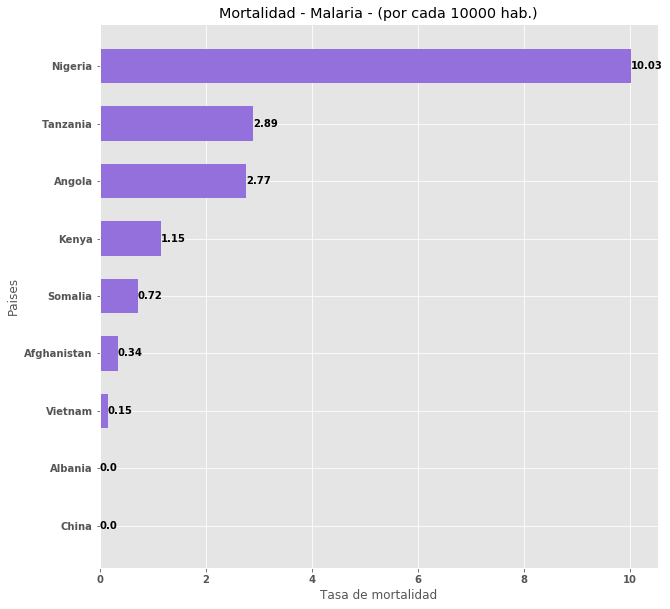

In [62]:
# Pruebas diseñadas y ejecutadas en el apartado g)
# comparar_mortalidad - OK
# ¿Y si la tasa de mortalidad de un pais es cero?
param_paises = {"Somalia","Tanzania","Afghanistan","Angola", "Albania","China","Vietnam","Nigeria","Kenya"}
comparar_mortalidad(df_fallecimientos, datos_poblacion, param_paises, 2015, "- Malaria -", 10000)

__NOTA__ : Dado que la función __calcular_tasa_fallecimiento( )__ , junto con __filtrar_tabla( )__ ya controlan los errores, no es necesario volver a comprobarlos en este apartado (en caso de, por ejemplo, introducir un país que no existe, __filtrar_tabla( )__ respondería con un error).

## Apartado h)

Desearíamos saber el total de muertes en un año dado por cada causa. Esto se puede calcular de varias maneras. Te pido ahora que resuelvas este problema con un programa iterativo, que recorre países y va acumulando en un diccionario las cantidades de cada causa.

### Solución

Antes de dar comienzo a la solución del apartado, debemos echar un vistazo previo a la tabla de datos. Analizando las filas del fichero, podemos observar que no solo existen valores de mortalidad de diferentes países, sino incluso de regiones, incluyendo Europa (Oriental y Occidental), Asia, Norte América, América Central, África y Oceanía, incluso regiones dentro de países como Gales o Escocia. Hasta el momento, el hecho de disponer de regiones no ha supuesto un problema en el desarrollo del proyecto. Sin embargo, a la hora de calcular el total de fallecimientos en un año puede ser un inconveniente.

Esto implicaría que, en caso de calcular el total de fallecimientos, no solo se acumularían los valores de diferentes países, sino además los valores de cada una de las regiones, es decir, estaríamos sumando el mismo fallecido más de una vez. Para el desarrollo de este apartado (e incluso para el map-reduce) se deben eliminar todas aquellas filas que contengan regiones. Para ello, se ha diseñado una función denominada __eliminar_filas( )__ . Dicha función permite eliminar las filas de un DataFrame ( _df_fallecimientos_ ) en funcion de una columna (en nuestro caso el campo _Entity_ ), eliminando aquellas filas cuyo campo _Entity_ esté contenido en un fichero de texto.

```
eliminar_filas(df_fallecimientos, columna, fichero)
```

En este caso, dicho fichero (denominado _regiones.txt_ ) contiene los nombres de cada una de las regiones a eliminar.

Para ello, la función extrae del fichero el conjunto de regiones almacenadas, guardando cada una de ellas en una lista. Finalmente, dicha función filtrará aquellas filas del DataFrame, gracias a la función _filtrar_tabla_ previamente definida:

In [63]:
def eliminar_filas(df_fallecimientos, columna, fichero):
    """
    Funcion encargada de eliminar aquellas filas del DataFrame en funcion de los 
    valores de la columna indicada, eliminando aquellos que esten contenidos en el fichero

    Parameters
    ----------
    df_fallecimientos : pandas.DataFrame
        DataFrame con los valores de mortalidad en los distintos paises y annos
    columna : str
        Nombre de la columna
    fichero : str
        Ruta del fichero de texto con el que aplicar el filtro

    Returns
    -------
    pandas.DataFrame
        DataFrame con los valores filtrados
        
    Precondition
    ------------
    El fichero:
               debe estar situado en la ruta indicada por parametro
               debe estar en formato .txt
    La columna indicada debe estar contenida en el DataFrame
    """
    if not os.path.exists(fichero):
        raise FileNotFoundError("Error. El fichero no se encuentra en el directorio actual")
        
    elif not fichero.endswith(".txt"):
        raise Exception("Error. El fichero debe estar en formato txt")
    
    elif columna not in df_fallecimientos.columns:
        raise KeyError("Error. La columna \'" + columna + "\' no forma parte del DataFrame")
    
    with open(fichero, "r") as f:
        regiones = {pais.rstrip('\n') for pais in f.readlines()}

    filtro = set(df_fallecimientos[columna].values) - regiones
    return filtrar_tabla(df_fallecimientos, columna, filtro)

Para comprobar su correcto funcionamiento, realicemos una comparativa entre el número de filas del DataFrame antes y después de aplicar la función:

In [64]:
# Prueba eliminar_filas - OK
print("Numero de filas antes de eliminar_filas: " , df_fallecimientos.shape[0])
df_fallecimientos = eliminar_filas(df_fallecimientos, ENTITY, "./ficheros/regiones.txt")
print("Numero de filas despues de eliminar_filas: " , df_fallecimientos.shape[0])

Numero de filas antes de eliminar_filas:  6686
Numero de filas despues de eliminar_filas:  5559


Incluso podemos comprobarlo leyendo de nuevo el fichero de texto y averiguar si existe alguna region ( _any_ ) contenida en el DataFrame: 

In [65]:
# Comprobamos si se han borrado todas las regiones
with open("./ficheros/regiones.txt", "r") as f:
        conjunto_paises = [pais.rstrip('\n') for pais in f.readlines()]
print("¿Existen regiones? ", any(df_fallecimientos[columna].isin(conjunto_paises)))

¿Existen regiones?  False


Sin embargo, puede ocurrir que el fichero no se encuentre en el directorio especificado, o bien que no esté en formato .txt e incluso que la columna indicada por parámetro no forme parte del DataFrame.

In [66]:
# Prueba eliminar_filas - FALLO (El fichero no se encuentra en el directorio especificado)
eliminar_filas(df_fallecimientos, ENTITY, "no_existe.txt")

FileNotFoundError: Error. El fichero no se encuentra en el directorio actual

In [67]:
# Prueba eliminar_filas - FALLO (El fichero no esta en formato .txt)
eliminar_filas(df_fallecimientos, ENTITY, "causas_de_muerte.ipynb")

Exception: Error. El fichero debe estar en formato txt

In [68]:
# Prueba eliminar_filas - FALLO (La columna indicada no existe)
eliminar_filas(df_fallecimientos, "No existe", "./ficheros/regiones.txt")

KeyError: "Error. La columna 'No existe' no forma parte del DataFrame"

Una vez eliminadas las filas, cabe destacar un detalle más: existen determinadas filas en el DataFrame con valores a cero. A modo de ejemplo, Yugoslavia no tiene registrado ningun fallecimiento en determinados años, salvo en la columna _Terrorism (deaths)_ . Analizando el fichero, existen determinados paises que solo tienen registrados fallecimientos por terrorismo, principalmente en países que ya no existen (Yugoslavia, Unión Soviétia, Checoslovaquia). De cara a calcular el número de fallecimientos, deben tenerse en cuenta estas filas que, aunque solo contengan informacón de una columna, es información que puede perderse si se elimina.

Una vez preprocesado el DataFrame, elaboramos la función para este apartado, denominada __suma_causas_fallecimientos( )__ encargada de recorrer, de forma completamente iterativa a través de bucles for, cada una de las filas del DataFrame pasado por parametro (empleando el método _iterrows_ ), filtrando aquellas filas que coincidan con el año de consulta, gracias a la función _filtrar_tabla_ . Por cada causa, se añade una nueva posición al diccionario, acumulando en cada posición el número de fallecimientos:

In [69]:
def suma_causas_fallecimientos(df_fallecimientos, param_anno, columnas):
    """
    Funcion que calcula el total de fallecimientos en un anno en las columnas dadas

    Parameters
    ----------
    df_fallecimientos: pandas.DataFrame
        DataFrame con los valores de mortalidad en los distintos paises y annos
    param_anno : int
        Anno a consultar
    columnas : set
        Conjunto de columnas con las causas de fallecimiento a calcular

    Returns
    -------
    dict
        Diccionario con la suma acumulada de cada causa de fallecimiento
    
    Preconditions
    -------------
    Las columnas:
                 deben estar incluidas en el DataFrame
                 deben contener valores numericos
    
    Example
    -------
    >>> suma_causas_fallecimientos(df_fallecimientos, 2015, {'- Poisonings -'})
    {
        '- Poisonings -': 73894
    }
    """
    df_filtrado = filtrar_tabla(df_fallecimientos, YEAR, {param_anno})
    
    if not columnas.issubset(df_filtrado.columns):
        columnas_sobrantes = columnas - set(df_filtrado.columns)
        raise KeyError("Error. El conjunto " + str(columnas_sobrantes) + " no son columnas del DataFrame")
    
    try:
        causa_fallecimientos = dict()
        
        for _, fila in df_filtrado.iterrows():
            for columna in sorted(columnas):
                if columna not in causa_fallecimientos.keys():
                    causa_fallecimientos[columna] = round(fila[columna])
                else:
                    causa_fallecimientos[columna] += round(fila[columna])
        return causa_fallecimientos
    
    except TypeError as e:
        print("Error. El DataFrame contiene valores NO numericos")

Una vez diseñada la función, realizamos una primera prueba con los valores de mortalidad en el año 2015:

In [70]:
# Pruebas diseñadas y ejecutadas en el apartado h) 
# suma_causas_fallecimientos - OK
# Recuperamos las columnas con las causas de fallecimiento (a partir de la tercera columna)
columnas_causas = set(df_fallecimientos.columns[2:])
total_fallecimientos = suma_causas_fallecimientos(df_fallecimientos, 2015, columnas_causas)
print("Prueba 1. Suma_causas_fallecimientos (OK): \n", json.dumps(total_fallecimientos, indent = 4))

Prueba 1. Suma_causas_fallecimientos (OK): 
 {
    "- Alcohol use disorders -": 177927,
    "- Alzheimer disease and other dementias -": 2344611,
    "- Cardiovascular diseases -": 17058667,
    "- Chronic kidney disease -": 1181480,
    "- Chronic respiratory diseases -": 3720569,
    "- Cirrhosis and other chronic liver diseases -": 1268683,
    "- Conflict and terrorism -": 137507,
    "- Diabetes mellitus -": 1295577,
    "- Diarrheal diseases -": 1577630,
    "- Digestive diseases -": 2282849,
    "- Drowning -": 306464,
    "- Drug use disorders -": 147223,
    "- Environmental heat and cold exposure -": 57633,
    "- Exposure to forces of nature -": 14737,
    "- Fire, heat, and hot substances -": 121418,
    "- HIV/AIDS -": 1120138,
    "- Hepatitis -": 126803,
    "- Interpersonal violence -": 399049,
    "- Intestinal infectious diseases -": 159214,
    "- Lower respiratory infections -": 2577301,
    "- Malaria -": 662050,
    "- Maternal disorders -": 199280,
    "- Meningi

Gracias a que la columna se pasa como parámetro, sería posible incluso consultar el total de fallecimientos de una causa en particular:

In [71]:
# suma_causas_fallecimientos - OK
columnas_causas = {"- Poisonings -"}
total_fallecimientos = suma_causas_fallecimientos(df_fallecimientos, 2015, columnas_causas)
print("Prueba 2. Suma_causas_fallecimientos (OK): \n", json.dumps(total_fallecimientos, indent = 4))

Prueba 2. Suma_causas_fallecimientos (OK): 
 {
    "- Poisonings -": 73894
}


Por último, puede ocurrir que el conjunto de colummas indicadas por parámetro no formen parte del DataFrame, e incluso que los datos contenidos sean no numéricos, en cuyo caso la función responderá con un mensaje de error:

In [72]:
# suma_causas_fallecimientos - FALLO (la columna/s indicada/s no existe/n)
columnas_causas = {"- Road injuries -", "No existe"}
total_fallecimientos = suma_causas_fallecimientos(df_fallecimientos, 2016, columnas_causas)

KeyError: "Error. El conjunto {'No existe'} no son columnas del DataFrame"

In [73]:
# suma_causas_fallecimientos - FALLO (el DataFrame contiene valores no numericos)
# Para ello, adjuntamos a la funcion todas las columnas (incluida Entity, un str)
columnas_causas = set(df_fallecimientos.columns)
total_fallecimientos = suma_causas_fallecimientos(df_fallecimientos, 2016, columnas_causas)

Error. El DataFrame contiene valores NO numericos


## Apartados j) y k.2)

Diseña una colección de funciones que trabajan sucesivamente, cargando los datos, mostrando una parte pequeña de los mismos y, finalmente, generando una tabla como la de la Figura 1.

### Solución

Para la resolución de este apartado, prácticamente disponemos de todas las funciones necesarias, tanto para cargar los datos, filtrar y generar un subconjunto de ellos, así como su representación gráfica. Por ello, para la solución se ha planteado una función denominada __mostrar_numero_fallecidos(  )__ cuyos parámetros son el DataFrame con los valores de mortalidad ya cargados en el apartado e), así como el país y año de consulta como incluso un parámetro de escala, el cual servira tanto para el apartado j) como el k.2):

1. __Linear__ : siguiendo una escala lineal
2. __Log__ : siguiendo una escala logarítmica, de cara al apartado k.2)

De este modo, es posible utilizar la misma función para ambos apartados, tan solo lo único que habría que cambiar es el parámetro "escala":

```
mostrar_numero_fallecidos(df_fallecimientos, param_pais, param_anno, escala)
```

Dicha función filtra el DataFrame por país y año gracias a la función _filtrar_tabla_ , así como su representación gráfica mediante la función _imprimir_grafico_barras_ definida en el apartado g). El resto de la función consiste en añadir "características" adicionales a la gráfica, como el título, nombre de los ejes, así como la escala pasada por parámetro (este último mediante el método _set_scale_ de _matplotlib_ )

In [74]:
from matplotlib import cm
def mostrar_numero_fallecidos(df_fallecimientos, param_pais, param_anno, escala):
    """
    Funcion que muestra el numero de fallecidos en un pais y anno (segun una escala)

    Parameters
    ----------
    df_fallecimientos : pandas.DataFrame
        DataFrame con los valores de mortalidad del pais y anno
    param_pais : str
        Nombre del pais a consultar
    param_anno : int
        Anno de consulta
    escala: str
        Escala de representacion

    Returns
    -------
    ax : Figure
        Grafico de barras final, con el numero de fallecidos por cada causa
        
    Preconditions
    -------------
    La escala solo puede ser lineal (linear) o logaritmica (log)
    """
    df_causas_fallecimiento = pd.merge(filtrar_tabla(df_fallecimientos, ENTITY, {param_pais}),\
                                       filtrar_tabla(df_fallecimientos, YEAR, {param_anno}), how = "inner")
    
    df_causas_fallecimiento = df_causas_fallecimiento._get_numeric_data().drop(YEAR, axis = 1)
    if escala not in ["linear", "log"]:
        raise ValueError("Error. La escala solo puede ser lineal (linear) o logaritimica (log)")
    
    traspuesta = df_causas_fallecimiento.T.sort_values(0)
    traspuesta = traspuesta[~(traspuesta == 0).any(axis=1)]
    
    lista_colores = cm.get_cmap("viridis", len(traspuesta))
    grafico_barras = imprimir_grafico_barras(traspuesta.index, traspuesta[0], lista_colores.colors[::-1])
    
    for indice, valor in enumerate(traspuesta[0]):
            plt.text(valor, indice, formatear_numero(valor), verticalalignment="center", fontsize = 10)
    
    plt.title("Comparativa valores mortalidad. Pais: " + param_pais + ". Año: " + str(param_anno), fontweight="bold")
    plt.xlabel("Total fallecimientos. Escala - " + escala, fontweight="bold")
    plt.xscale(escala)
    plt.grid(axis='x', linestyle = '--')
    plt.yticks(fontsize = 13)
    
    return plt.show()

Un detalle a tener en cuenta es la función __formatear_numero( )__ que aparece al mostrar el valor de cada barra. Dado que los valores de mortalidad se mueven en torno al orden de cientos de miles e incluso millones, esta función permite dar "formato" a los numeros. Por ejemplo:

$4292232 = 4.23 Mill$

$125432  = 125,432$

In [75]:
def formatear_numero(numero):
    """
    Funcion que permite dar formato a un numero para su representacion grafica.
    Ejemplo:
        2145987 -> 2.14 Mill
        365786 -> 365,786

    Parameters
    ----------
    numero : int
        Numero a formatear

    Returns
    -------
    str
        Numero con el formato especifico (en funcion de si es del orden de millones o no)
    """
    if numero >= 10**6:
        return str(round(numero / 10**6, 2)) + " Mill."
    else:
        return format(round(numero), ",")

In [76]:
# Prueba con formatear_numero
print(formatear_numero(2145234), ";", formatear_numero(123432), ";", formatear_numero(123))

2.15 Mill. ; 123,432 ; 123


Una vez diseñada la función, realizamos las pruebas pertinentes. Dado que en el apartado h) eliminamos todas las regiones, utilizando las funciones definidas en el apartado e) volvemos a cargar los datos del fichero csv, eliminando de nuevo el caracter ">" de la columna _Number of executions_ :

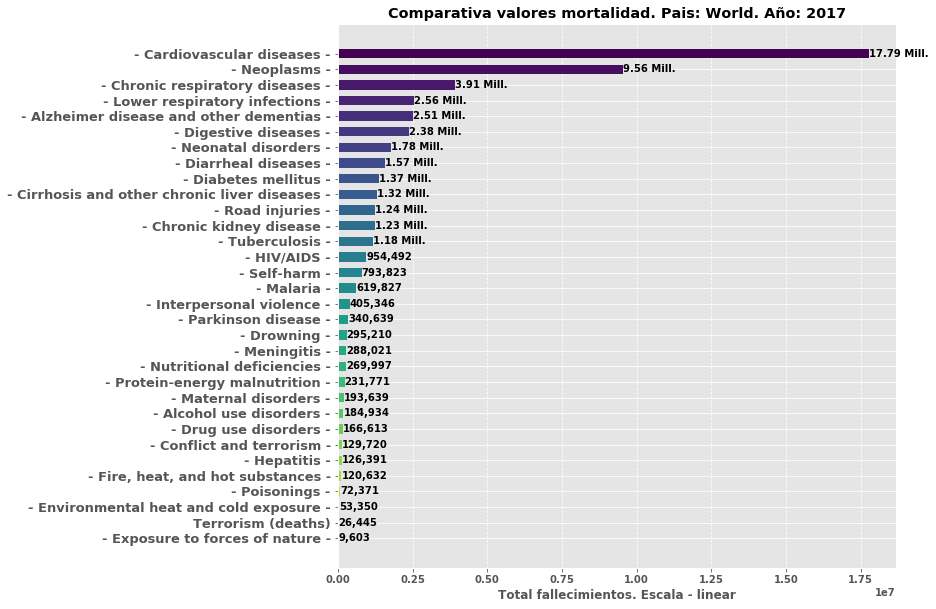

In [77]:
# Pruebas diseñadas y ejecutadas en el apartado j)
# volvemos a cargar nuevamente los datos
df_fallecimientos = causas_fallecimiento("./ficheros/annual-number-of-deaths-by-cause.csv")
columna = "Number of executions (Amnesty International)"
df_fallecimientos[columna] = eliminar_caracter(df_fallecimientos[columna], "[>]+")

# mostrar_numero_fallecidos - OK
mostrar_numero_fallecidos(df_fallecimientos, "World", 2017, "linear")

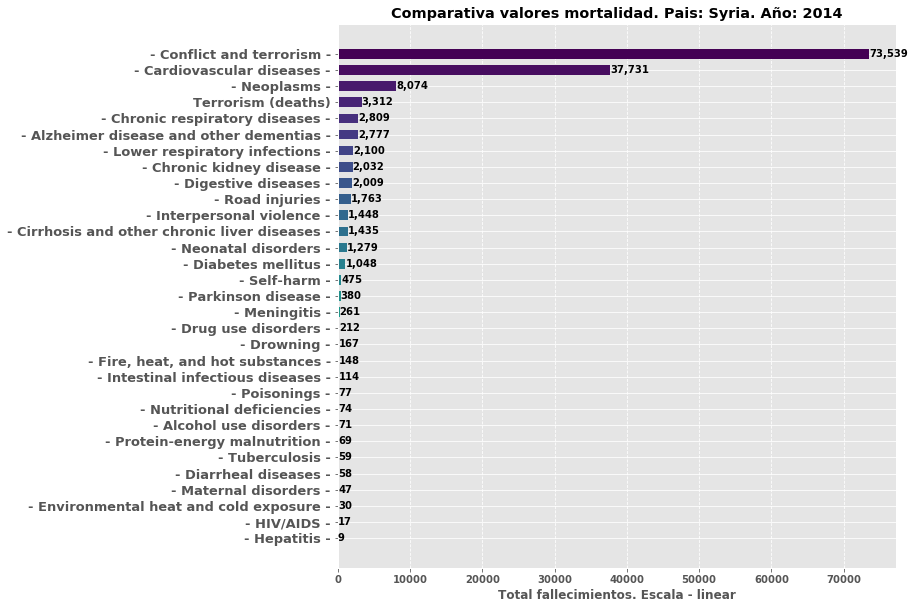

In [78]:
# mostrar_numero_fallecidos - OK
# A modo de ejemplo, durante la guerra civil Siria (2011 - actualidad)
mostrar_numero_fallecidos(df_fallecimientos, "Syria", 2014, "linear")

Como podemos observar a partir de la gráfica anterior, la función filtra aquellos valores de mortalidad que no sean cero, mostrando un gráfico de barras de forma ascendente. De cara al apartado k.2), podemos incluso modificar la escala a logarítimica, pasando el país y año como parámetro ( __versión intermedia__ ), suavizando de este modo el eje horizontal:

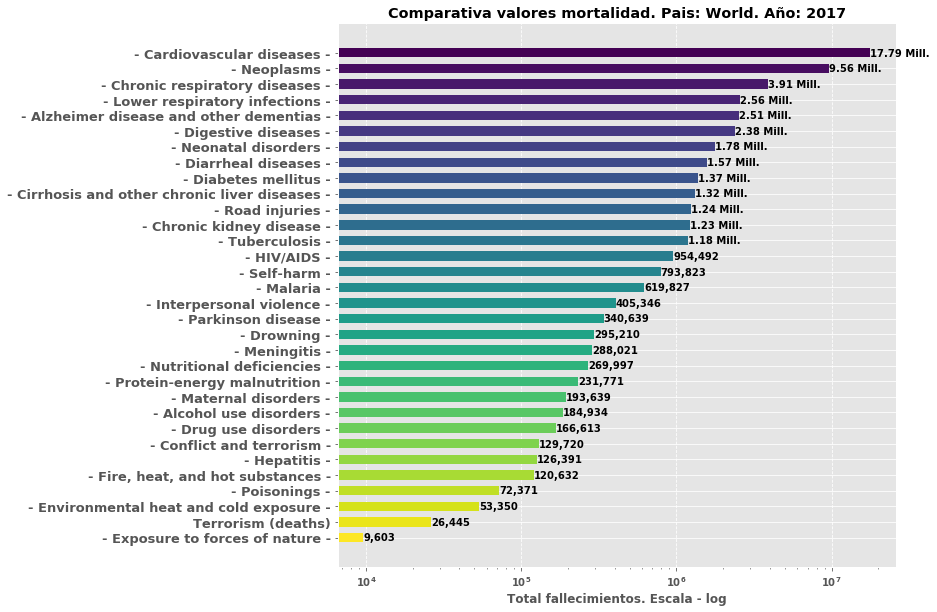

In [79]:
# Pruebas diseñadas y ejecutadas en el apartado k.2)
# mostrar_numero_fallecidos - OK
mostrar_numero_fallecidos(df_fallecimientos, "World", 2017, "log")

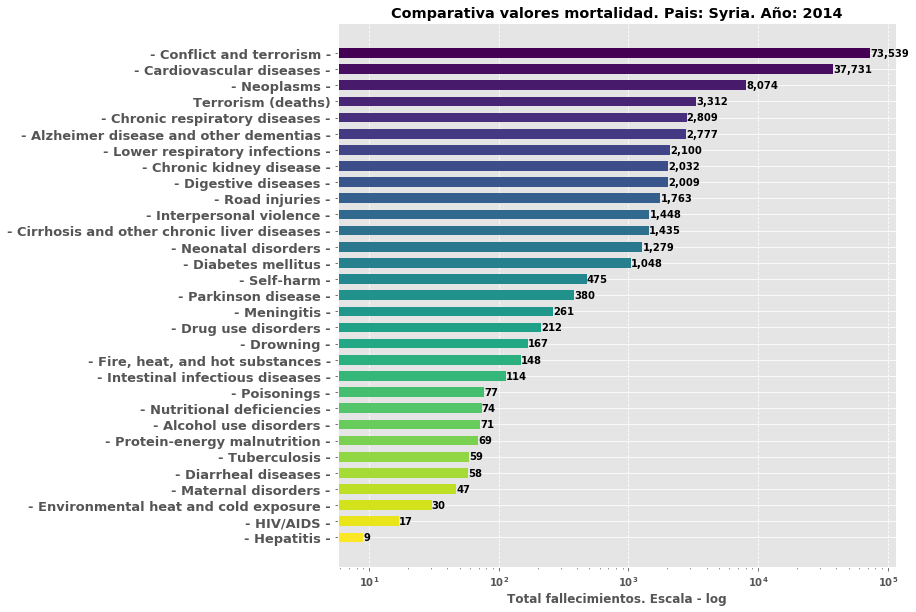

In [80]:
# mostrar_numero_fallecidos - OK
# A modo de ejemplo, durante la guerra civil Siria (2011 - actualidad)
mostrar_numero_fallecidos(df_fallecimientos, "Syria", 2014, "log")

Como última prueba, caben destacar si la escala elegida como parametro no es lineal ("linear") o logarítmica ("log"):

In [81]:
# mostrar_numero_fallecidos - FALLO (la escala elegida no es "linear" o "log")
mostrar_numero_fallecidos(df_fallecimientos, "Haiti", 2010, "no existe")

ValueError: Error. La escala solo puede ser lineal (linear) o logaritimica (log)

<hr>

### Datos personales

-   **Apellidos:** FERNÁNDEZ HERNÁNDEZ
-   **Nombre:** ALBERTO
-   **Email:** albertofernandezh98@gmail.com
-   **Fecha:** 15/10/2020

<hr>

### Ficha de autoevaluación

**Comentarios**:

|Apartado|Calificación|Comentario|
|-|-|-|
|a) |1.5 / 1.5  |Completamente resuelto |
|b) |1.5 / 1.5 |Completamente resuelto |
|c) |1.5 / 1.5  |Completamente resuelto |
|d) |1.5 / 1.5  |Completamente resuelto |
|e) |1.5 / 1.5 |Completamente resuelto |
|f) |0.5 / 0.5  |Completamente resuelto |
|g) |0.5 / 0.5  |Completamente resuelto |
|h) |0.5 / 0.5 |Completamente resuelto |
|i) |0.5 / 0.5  |Completamente resuelto |
|j) |0.4 / 0.4  |Completamente resuelto |
|k.2) |0.05 / 0.1  |Resuelto hasta el nivel intermedio |
|**Total** |**9.95** / 10.0|**Sobresaliente**|


**Nota**: La valoración de cada apartado será la siguiente:

- Apartados a, b, c, d, e: 1.5 puntos
- Apartados f, g, h, i: 0.5 puntos
- Apartado j: 0.4 puntos
- Apartado k: 0.1 puntos


### Ayuda recibida y fuentes utilizadas

[Cómo escalar un rango de valores a otra escala (empleado en el apartado d))](https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range/281164)

[Cómo filtrar valores en un DataFrame (empleado en la función filtrar_datos del apartado e))](https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/)

[Cómo iterar cada fila en un DataFrame (empleado en el apartado h)](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)

[Cómo añadir el valor en cada barra del gráfico (empleado en los apartados g), j) y k.2))](https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh)

[Catálogo de colores en matplotlib (empleado en los apartados g), j) y k.2))](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)

[Cómo cambiar a una escala logarítimica (empleado en los apartados j) y k.2))](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html#matplotlib.pyplot.xscale)

[Documentación de matplotlib](https://matplotlib.org/3.1.1/index.html)

[Documentación de pandas](https://pandas.pydata.org/)

Apuntes en Jupyter Notebook proporcionados por el profesor
### Comentario adicional

Como comentario adicional, quisiera destacar el uso de muchas funciones durante el desarrollo del proyecto, incluyendo funciones que, simplemente, eliminan caracteres o buscan algún patrón en una cadena. El objetivo es elaborar una función para problema planteado, reciclando lo máximo posible, limitando el uso de la línea de comandos, siempre que fuese posible, para probar el correcto uso de estas funciones, aunque la función realizada pudiera resolverse directamente desde un terminal (por ejemplo, eliminar un caracter en una columna)

Por otro lado, quisiera remarcar el uso de la función __eliminar_filas( )__ , una función que, realmente, podría haberse evitado ya que se dispone de una función similar ( __filtrar_tabla( )__ ). No obstante, he querido diseñar esta función con el fin de evitar tener una lista "grande" con todas las regiones en la línea de comandos, por lo que tenerlas almenadas en un fichero de texto y encapsularlo todo en una sola función me ha parecido una solución más "elegante".